In [64]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score

# from keras.models import Sequential
# from keras.layers import Dense, Conv2D, Flatten

import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
dataset = pd.read_csv('./datasets/glrlm_0.csv', sep=',', index_col=0).sample(frac=1)

In [27]:
dataset = pd.read_csv('./datasets/glcm_135.csv', delimiter="\t").sample(frac=1)

In [73]:
dataset.head()

,GLNU,HGRE,LGRE,isPatho
102,118.735494,3730.075463,0.000326,1
55,113.131899,439.273139,0.004399,0
75,173.160243,892.176924,0.002111,1
86,24.011673,7799.037938,0.000135,1
94,87.152405,5841.346126,0.000203,1


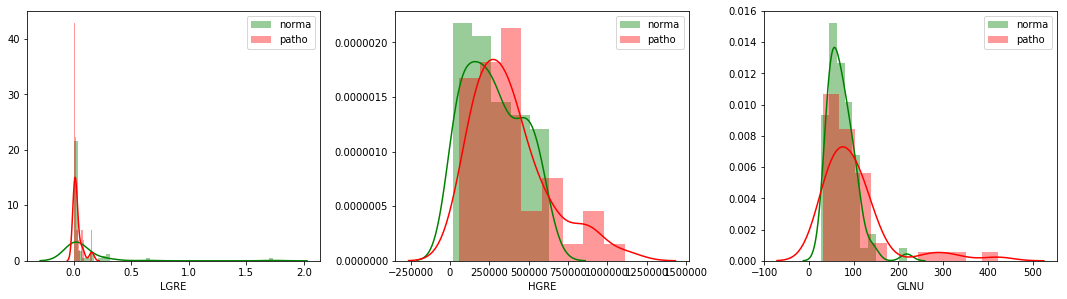

In [59]:
data = dataset.iloc[:, :-1]
fig = plt.figure(figsize = (20, 25))
j = 0
for i in data.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(data[i][dataset['isPatho']==0], color='g', label = 'norma')
    sns.distplot(data[i][dataset['isPatho']==1], color='r', label = 'patho')
    plt.legend(loc='best')
# fig.suptitle('Breast Cance Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

             LGRE      HGRE      GLNU   isPatho
LGRE     1.000000 -0.292385  0.280593 -0.138257
HGRE    -0.292385  1.000000  0.074788  0.238764
GLNU     0.280593  0.074788  1.000000  0.244867
isPatho -0.138257  0.238764  0.244867  1.000000


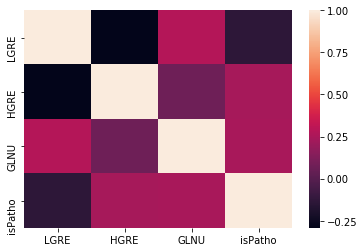

In [51]:
corr = dataset.corr()
print(corr)
sns.heatmap(corr)

In [61]:
print(dataset[dataset['isPatho'] == 0].loc[:, 'LGRE'].mean())
# print(dataset[dataset['isPatho'] == 0].loc[:, 'LGRE'].std())

print(dataset[dataset['isPatho'] == 1].loc[:, 'LGRE'].mean())
# print(dataset[dataset['isPatho'] == 1].loc[:, 'LGRE'].std())

0.0818347774430509
0.032266955454912476


In [74]:
X = dataset.iloc[:, 1:-1]
Y = dataset.iloc[:, -1]

In [75]:
seed = 7
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [76]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [77]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [80]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 54.17%


In [17]:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix  

In [11]:
clf = svm.SVC(gamma='scale')
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
y_pred = clf.predict(X_test)

In [15]:
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]


In [16]:
print(y_test)

82     1
107    1
15     0
99     1
81     1
62     0
36     0
106    1
27     0
115    1
21     0
12     0
105    1
19     0
2      0
53     0
87     1
93     1
45     0
10     0
114    1
17     0
69     1
68     1
Name: isPatho, dtype: int64


In [18]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

[[12  0]
 [11  1]]
              precision    recall  f1-score   support

           0       0.52      1.00      0.69        12
           1       1.00      0.08      0.15        12

   micro avg       0.54      0.54      0.54        24
   macro avg       0.76      0.54      0.42        24
weighted avg       0.76      0.54      0.42        24



In [19]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

In [23]:
scaler.fit(X_train)

/Users/ikachko/vcub/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [24]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

/Users/ikachko/vcub/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
/Users/ikachko/vcub/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [25]:
from sklearn.neural_network import MLPClassifier

In [26]:
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)


In [27]:
mlp.fit(X_train, y_train)

/Users/ikachko/vcub/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [28]:
predictions = mlp.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[8 4]
 [6 6]]
              precision    recall  f1-score   support

           0       0.57      0.67      0.62        12
           1       0.60      0.50      0.55        12

   micro avg       0.58      0.58      0.58        24
   macro avg       0.59      0.58      0.58        24
weighted avg       0.59      0.58      0.58        24

